# Exploratory data analysis and Prediction for Titanic data

The data of Titanic can be downloaded from kaggle:
https://www.kaggle.com/c/titanic

## Importing necessary libraries

In [180]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
plt.style.use('ggplot')

from sklearn.compose import make_column_transformer
from sklearn.preprocessing import RobustScaler
from sklearn.preprocessing import OneHotEncoder

from sklearn.preprocessing import OneHotEncoder, LabelEncoder
from sklearn.preprocessing import MinMaxScaler
from sklearn.model_selection import train_test_split

from sklearn.neighbors import KNeighborsClassifier
from sklearn import tree
from sklearn.tree import DecisionTreeClassifier
from sklearn.linear_model import LogisticRegression

from sklearn.model_selection import GridSearchCV
from sklearn.model_selection import cross_val_score
from sklearn.metrics import confusion_matrix, accuracy_score

# Load and Scan Data

In [181]:
train = pd.read_csv("titanic/train.csv")
test = pd.read_csv("titanic/test.csv")
print(train.shape)
train.head(10)

(891, 12)


,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S
5,6,0,3,"Moran, Mr. James",male,NaN,0,0,330877,8.4583,NaN,Q
6,7,0,1,"McCarthy, Mr. Timothy J",male,54.0,0,0,17463,51.8625,E46,S
7,8,0,3,"Palsson, Master. Gosta Leonard",male,2.0,3,1,349909,21.0750,NaN,S
8,9,1,3,"Johnson, Mrs. Oscar W (Elisabeth Vilhelmina Berg)",female,27.0,0,2,347742,11.1333,NaN,S
9,10,1,2,"Nasser, Mrs. Nicholas (Adele Achem)",female,14.0,1,0,237736,30.0708,NaN,C


We can see the data contains 891 passengers and 12 features. The label 'Survived' is our target.

In [182]:
print(test.shape)
test.head()

(418, 11)


,PassengerId,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,892,3,"Kelly, Mr. James",male,34.5,0,0,330911,7.8292,NaN,Q
1,893,3,"Wilkes, Mrs. James (Ellen Needs)",female,47.0,1,0,363272,7.0000,NaN,S
2,894,2,"Myles, Mr. Thomas Francis",male,62.0,0,0,240276,9.6875,NaN,Q
3,895,3,"Wirz, Mr. Albert",male,27.0,0,0,315154,8.6625,NaN,S
4,896,3,"Hirvonen, Mrs. Alexander (Helga E Lindqvist)",female,22.0,1,1,3101298,12.2875,NaN,S


## Exploratory data analysis

In [183]:
train.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 12 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   PassengerId  891 non-null    int64  
 1   Survived     891 non-null    int64  
 2   Pclass       891 non-null    int64  
 3   Name         891 non-null    object 
 4   Sex          891 non-null    object 
 5   Age          714 non-null    float64
 6   SibSp        891 non-null    int64  
 7   Parch        891 non-null    int64  
 8   Ticket       891 non-null    object 
 9   Fare         891 non-null    float64
 10  Cabin        204 non-null    object 
 11  Embarked     889 non-null    object 
dtypes: float64(2), int64(5), object(5)
memory usage: 83.7+ KB


In [184]:
train.isnull().sum()

PassengerId      0
Survived         0
Pclass           0
Name             0
Sex              0
Age            177
SibSp            0
Parch            0
Ticket           0
Fare             0
Cabin          687
Embarked         2
dtype: int64

It is clear that the 3 features "Age", "Cabin", and "Embarked" contain null values. We will deal with this problem later.

### The proportion of survival passengers

In [185]:
train["Survived"].value_counts()

0    549
1    342
Name: Survived, dtype: int64

<AxesSubplot:xlabel='Survived', ylabel='count'>

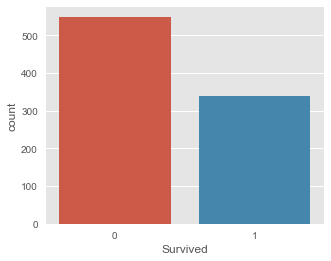

In [310]:
plt.figure(figsize=(5, 4))
sns.countplot(x="Survived", data=train)

In the trianing set, only about 38% of total passengers survived. Next, we'll examine the relationship between the label "Survived" and other features.

### The relationship between the label "Survived" and other features.

#### "Pclass" (ordinal feature)

In [187]:
pd.crosstab(train.Pclass, train.Survived, margins=True).style.background_gradient(cmap='PuBu')

Survived,0,1,All
Pclass,,,
1,80,136,216
2,97,87,184
3,372,119,491
All,549,342,891


C:\Users\alien\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


Text(0.5, 1.0, 'Pclass: dead(0) or survived(1)')

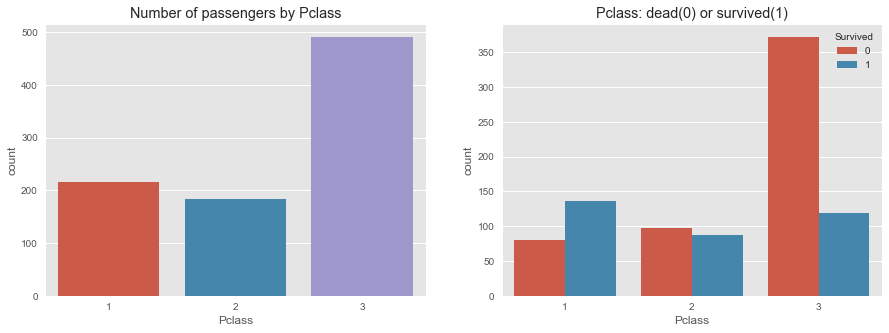

In [188]:
fig, ax = plt.subplots(1,2,figsize=(15,5))

sns.countplot(x="Pclass", data=train, ax=ax[0])
ax[0].set_title('Number of passengers by Pclass')

sns.countplot('Pclass',hue='Survived',data=train, ax=ax[1])
ax[1].set_title('Pclass: dead(0) or survived(1)')

The passengers of Pclass 3 account for 55% of total passengers. It can be observed that the passengers of Pclass 3 has a lower survival rate, only near 25% passengers survived in Pclass 3. However, the passengers of Plass 1 and 2 has approximately 63% 47% survival rate, respectively.

#### "Name"

Since Name is string objects, we transfer Name into categorical variable by their title using Regex.

In [189]:
train['Title'] = 0
for i in train:
    train['Title']=train.Name.str.extract('([A-Za-z]+)\.')

In [190]:
train['Title'].value_counts()

Mr          517
Miss        182
Mrs         125
Master       40
Dr            7
Rev           6
Mlle          2
Major         2
Col           2
Sir           1
Jonkheer      1
Don           1
Lady          1
Ms            1
Capt          1
Mme           1
Countess      1
Name: Title, dtype: int64

In [191]:
pd.crosstab(train.Sex, train.Title).style.background_gradient(cmap='PuBu') 

Title,Capt,Col,Countess,Don,Dr,Jonkheer,Lady,Major,Master,Miss,Mlle,Mme,Mr,Mrs,Ms,Rev,Sir
Sex,,,,,,,,,,,,,,,,,
female,0,0,1,0,1,0,1,0,0,182,2,1,0,125,1,0,0
male,1,2,0,1,6,1,0,2,40,0,0,0,517,0,0,6,1


Some title has different name but same maeaning, so we change salutations to one with the same meaning.
1. The title "Capt", "Don", "Dr", "Major", "Sir" to "Mr"
2. The title "Countess", "Lady" to "Mrs"
3. The title "Mlle", "Mme", "Ms" to "Miss"
4. The title "Col", "Jonkheer", "Rev" to "Other"

In [192]:
train["Title"].replace(["Capt", "Don", "Dr", "Major", "Sir", "Countess", "Lady", "Mlle", "Mme", "Ms", "Col", "Jonkheer", "Rev"],
                       ["Mr", "Mr", "Mr", "Mr", "Mr", "Mrs", "Mrs", "Miss", "Miss", "Miss", "Other", "Other", "Other"], 
                       inplace=True)

In [193]:
train['Title'].value_counts()

Mr        529
Miss      186
Mrs       127
Master     40
Other       9
Name: Title, dtype: int64

#### "Sex" (categorical feature)

In [194]:
pd.crosstab(train.Sex, train.Survived, margins=True).style.background_gradient(cmap='PuBu')

Survived,0,1,All
Sex,,,
female,81,233,314
male,468,109,577
All,549,342,891


C:\Users\alien\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


Text(0.5, 1.0, 'Sex: dead(0) or survived(1)')

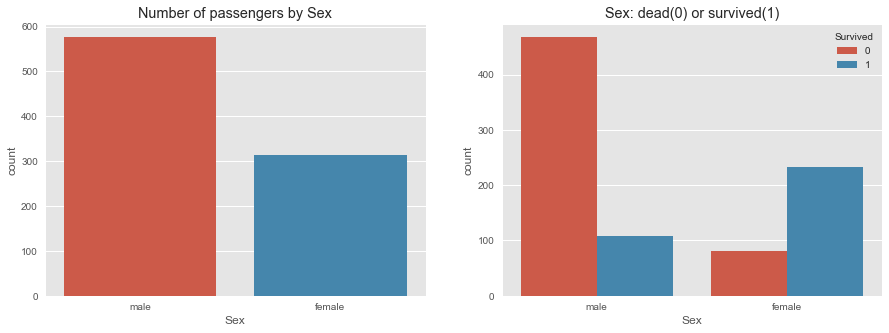

In [195]:
fig, ax = plt.subplots(1,2,figsize=(15,5))

sns.countplot(x="Sex", data=train, ax=ax[0])
ax[0].set_title('Number of passengers by Sex')

sns.countplot('Sex',hue='Survived',data=train, ax=ax[1])
ax[1].set_title('Sex: dead(0) or survived(1)')

Although male make up a larger proportion of the passengers (about 65%), the survival rate of female passengers is much higher than that of male passengers (74% vs. 19%). This is due to rescue policy of giving priority to children and female. 

Next, we examine the survival rate of Sex and Pclass simultaneously​.

In [196]:
pd.crosstab([train.Sex, train.Survived], train.Pclass, margins=True).style.background_gradient(cmap='PuBu')

C:\Users\alien\anaconda3\lib\site-packages\seaborn\categorical.py:3704: UserWarning: The `factorplot` function has been renamed to `catplot`. The original name will be removed in a future release. Please update your code. Note that the default `kind` in `factorplot` (`'point'`) has changed `'strip'` in `catplot`.
  warnings.warn(msg)
C:\Users\alien\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


<Figure size 360x288 with 0 Axes>

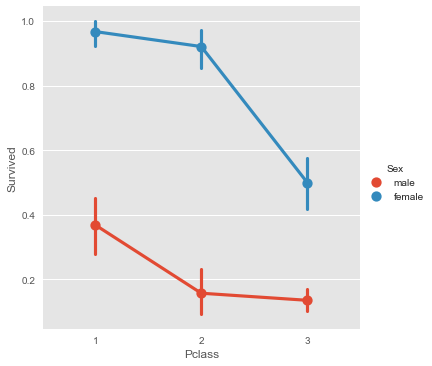

In [311]:
plt.figure(figsize=(5, 4))
sns.factorplot('Pclass','Survived',hue='Sex',data=train)

From the FactorPlot, it can be observed that female have a higher survival rate than male in each Pclass. In the case of female, the survival rate of Pclass 1 and 2 (both higher than 90%) is much higher than Pclass 3 (only 50%). Female has a lower survival rate in Pclass 3. In terms of male, male in Pclass 1 has higher survival rate.

#### "Age" (continuous feature)

The Age has 177 null vlues. Firstly, we covert these null values to appropriate values instead. It seems appropriate to use the average age of the title in place of these null values.

In [198]:
train.groupby('Title')['Age'].mean().round()

Title
Master     5.0
Miss      22.0
Mr        33.0
Mrs       36.0
Other     46.0
Name: Age, dtype: float64

In [199]:
train.loc[(train.Age.isnull()) & (train.Title=='Master'), 'Age'] = 5
train.loc[(train.Age.isnull()) & (train.Title=='Miss'), 'Age'] = 22
train.loc[(train.Age.isnull()) & (train.Title=='Mr'), 'Age'] = 33
train.loc[(train.Age.isnull()) & (train.Title=='Mrs'), 'Age'] = 36
train.loc[(train.Age.isnull()) & (train.Title=='Other'), 'Age'] = 46

In [200]:
train.isnull().sum()

PassengerId      0
Survived         0
Pclass           0
Name             0
Sex              0
Age              0
SibSp            0
Parch            0
Ticket           0
Fare             0
Cabin          687
Embarked         2
Title            0
dtype: int64

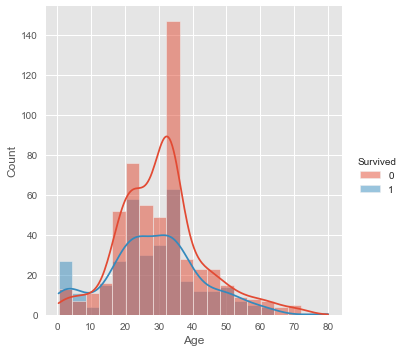

In [201]:
sns.displot(train, x="Age", hue="Survived", kde=True, bins=20)

It can be found that children whose age below 10 has higher survival rate. Contrastly, the passengers whose age between 30 and 40 has higher death rate.

#### SibSip (discrete feature)

In [202]:
pd.crosstab(train.SibSp, train.Survived, margins=True).style.background_gradient(cmap='PuBu')

Survived,0,1,All
SibSp,,,
0,398,210,608
1,97,112,209
2,15,13,28
3,12,4,16
4,15,3,18
5,5,0,5
8,7,0,7
All,549,342,891


C:\Users\alien\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


Text(0.5, 1.0, 'SibSp vs. Survived')

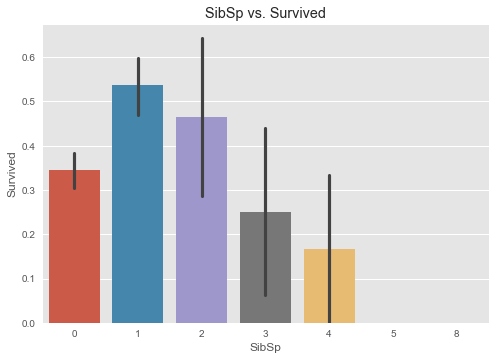

In [203]:
sns.barplot('SibSp','Survived', data=train)
plt.title("SibSp vs. Survived")

The passengers has 1 or 2 sibling or spouse have higher survival rate. This may be because they can help each other. The number of sibling and spouse greater than 2 significantly decrease the survival rate. This result may cause from other feature.

In [204]:
pd.crosstab(train.SibSp, train.Pclass).style.background_gradient(cmap='PuBu')

Pclass,1,2,3
SibSp,,,
0,137,120,351
1,71,55,83
2,5,8,15
3,3,1,12
4,0,0,18
5,0,0,5
8,0,0,7


From the crosstab, most of the passengers having 3 siblings or spouse are in Pclass 3. Moreover, SibSp 4, 5, and 8　are all belong to Pclass 3. 

#### "Parch" (discrete feature)

In [205]:
pd.crosstab(train.Parch, train.Survived, margins=True).style.background_gradient(cmap='PuBu')

Survived,0,1,All
Parch,,,
0,445,233,678
1,53,65,118
2,40,40,80
3,2,3,5
4,4,0,4
5,4,1,5
6,1,0,1
All,549,342,891


C:\Users\alien\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


Text(0.5, 1.0, 'SibSp vs. Survived')

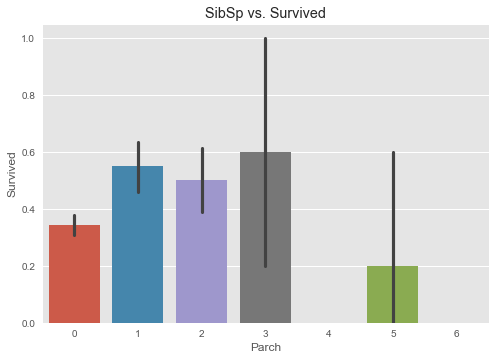

In [206]:
sns.barplot('Parch','Survived', data=train)
plt.title("SibSp vs. Survived")

The passengers has 1, 2, Aand 3 parent or children have higher survival rate, while Parch 4 to 6 has lower survival rate. Again, we examine the relationship between Parch and Pclass.

In [207]:
pd.crosstab(train.Parch, train.Pclass).style.background_gradient(cmap='PuBu')

Pclass,1,2,3
Parch,,,
0,163,134,381
1,31,32,55
2,21,16,43
3,0,2,3
4,1,0,3
5,0,0,5
6,0,0,1


We can only find most of Parch 4, 5, 6 are Pclass 3. However, their corresponding cases are rare, we can't conduct any conclusion.

#### Tickets
We didn't consider the feature "Ticket" because it is a combination of numbers with no particular pattern.

#### "Fare" (continuous feature)

In [208]:
train['Fare'].sort_values()

271      0.0000
597      0.0000
302      0.0000
633      0.0000
277      0.0000
         ...   
438    263.0000
341    263.0000
737    512.3292
258    512.3292
679    512.3292
Name: Fare, Length: 891, dtype: float64

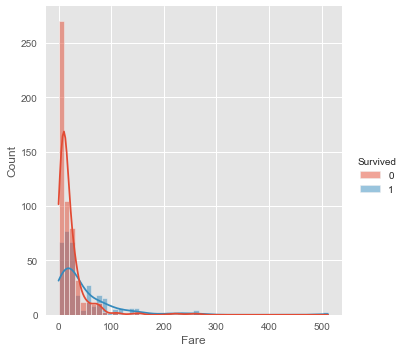

In [209]:
sns.displot(train, x="Fare", hue="Survived", kde=True, bins=50)
# Or we can convert the continuous variable to categorical variable: train['Fare_cat'] = pd.qcut(train['Fare'], 4)

From the histogram, we can find Fare greater than 40 or 50 has higher survival rate.

#### "Cabin"
Since there are about 75% null values in "Cabin", so we decided to drop the feature "Cabin".

In [210]:
train = train.drop('Cabin', axis=1)

#### "Embarked" (categorical feature)

In [211]:
pd.crosstab(train.Embarked, train.Survived, margins=True).style.background_gradient(cmap='PuBu')

Survived,0,1,All
Embarked,,,
C,75,93,168
Q,47,30,77
S,427,217,644
All,549,340,889


C:\Users\alien\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


Text(0.5, 1.0, 'Embarked: dead(0) or survived(1)')

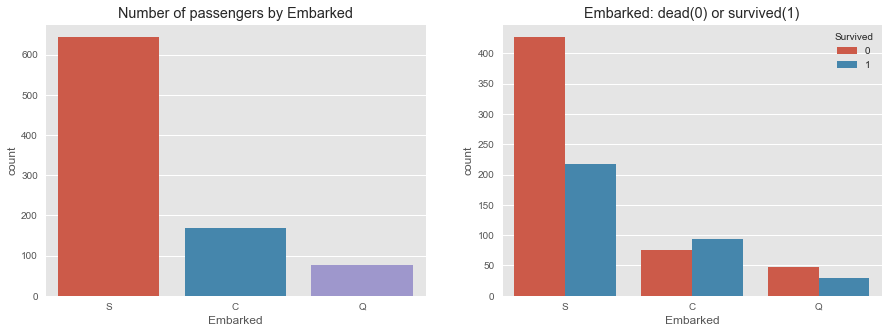

In [212]:
fig, ax = plt.subplots(1,2,figsize=(15,5))

sns.countplot(x="Embarked", data=train, ax=ax[0])
ax[0].set_title('Number of passengers by Embarked')

sns.countplot('Embarked',hue='Survived',data=train, ax=ax[1])
ax[1].set_title('Embarked: dead(0) or survived(1)')

There are about 72% passengers boarded from S. In addition, the passengers boarding from C has higher survival rate, which is about 55%. Next, Embarked has 2 null values, we just delete the corresponding passenger records in the data.

In [213]:
train.Embarked.isnull().sum()

2

In [214]:
train = train.dropna(subset=['Embarked'])

In [215]:
# check the null values
train.isnull().sum()

PassengerId    0
Survived       0
Pclass         0
Name           0
Sex            0
Age            0
SibSp          0
Parch          0
Ticket         0
Fare           0
Embarked       0
Title          0
dtype: int64

### Correlation Between Features
Before we check the correlation between features, we delete other unnecessary features.

In [216]:
train = train.drop(['PassengerId', 'Name', 'Ticket'], axis=1)

In [220]:
train.columns

Index(['Survived', 'Pclass', 'Sex', 'Age', 'SibSp', 'Parch', 'Fare',
       'Embarked', 'Title'],
      dtype='object')

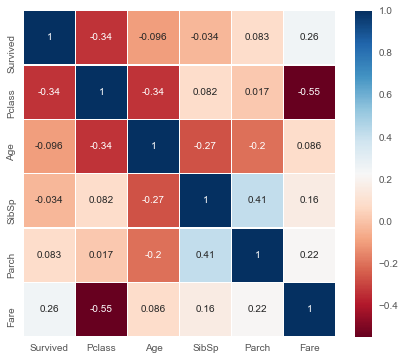

In [241]:
sns.heatmap(train.corr(), annot=True, cmap='RdBu', linewidths=0.2)
# cmap: https://matplotlib.org/3.1.1/tutorials/colors/colormaps.html

fig=plt.gcf()
fig.set_size_inches(7,6)

We can find that Survived and Pclass have moderate negative correlation. This means Pclass may be one of the important feature to predict that passengers survived or not. Furthermore, Pclass and Fare has high negative correlation. This makes sence because higher fare can live higher level of Pclass (lower number of Pclass).

## Data preprocessing

### Label Encoding and Feature Scaling

In [291]:
enc = OneHotEncoder(handle_unknown ='ignore')

In [243]:
train.head()

,Survived,Pclass,Sex,Age,SibSp,Parch,Fare,Embarked,Title
0,0,3,male,22.0,1,0,7.2500,S,Mr
1,1,1,female,38.0,1,0,71.2833,C,Mrs
2,1,3,female,26.0,0,0,7.9250,S,Miss
3,1,1,female,35.0,1,0,53.1000,S,Mrs
4,0,3,male,35.0,0,0,8.0500,S,Mr


In [244]:
x = train.iloc[:, 1:] 
x.head()

,Pclass,Sex,Age,SibSp,Parch,Fare,Embarked,Title
0,3,male,22.0,1,0,7.2500,S,Mr
1,1,female,38.0,1,0,71.2833,C,Mrs
2,3,female,26.0,0,0,7.9250,S,Miss
3,1,female,35.0,1,0,53.1000,S,Mrs
4,3,male,35.0,0,0,8.0500,S,Mr


We transfer categorical features using One-Hot-Encoder and applying feature scaling by MinMaxScaler.

In [245]:
column_trans = make_column_transformer((OneHotEncoder(), ['Sex', 'Embarked', 'Title']),
                                       remainder=MinMaxScaler())
x = column_trans.fit_transform(x)

In [273]:
x.shape

(889, 15)

In [247]:
y = train.iloc[:, 0]
y.head()

0    0
1    1
2    1
3    1
4    0
Name: Survived, dtype: int64

## Train model

### KNN

In [276]:
x_train, x_val, y_train, y_val = train_test_split(x, y, test_size = 0.2, random_state = 0, stratify=train['Survived'])

In [277]:
parameters1 = [{'n_neighbors': [2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12],
                'p': [1, 2]}]

classifier1 = GridSearchCV(estimator=KNeighborsClassifier(),
                           param_grid=parameters1,
                           scoring='accuracy',
                           cv=10,
                           n_jobs=-1)

classifier1 = classifier1.fit(x, y)

In [278]:
classifier1.cv_results_['mean_test_score']

array([0.79304137, 0.79754852, 0.81104443, 0.81331716, 0.8098953 ,
       0.80878447, 0.79980848, 0.7953141 , 0.82341675, 0.8189096 ,
       0.82005873, 0.81781154, 0.82452758, 0.82789837, 0.81781154,
       0.81664964, 0.81330439, 0.81667518, 0.80993361, 0.80653728,
       0.81555158, 0.81214249])

In [279]:
best_accuracy1 = classifier1.best_score_
best_parameters1 = classifier1.best_params_
print(best_accuracy1)
print(best_parameters1)

0.8278983656792646
{'n_neighbors': 8, 'p': 2}


In [280]:
y_pred1 = classifier1.predict(x_val)
cm1 = confusion_matrix(y_val, y_pred1)
cm1

array([[106,   4],
       [ 19,  49]], dtype=int64)

<AxesSubplot:>

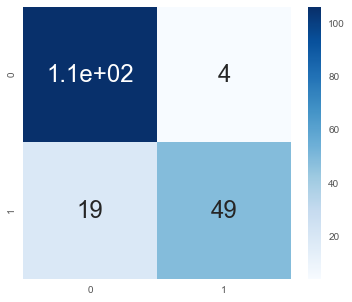

In [281]:
plt.figure(figsize = (6,5))
sns.heatmap(cm1, annot=True,annot_kws={"size": 24}, cmap="Blues") # 'coolwarm' 'Greens' 'BuPu' 'YlGnBu'

In [284]:
acc1 = accuracy_score(y_val, y_pred1)
acc1

0.8707865168539326

### Decision Tree

In [285]:
parameters2 = [{'criterion': ['gini', 'entropy'], 
                'ccp_alpha': [0, 0.0011, 0.0012, 0.0013, 0.0014, 0.0015, 0.002, 0.004, 0.006, 0.008, 0.01, 0.1, 0.2]}]

classifier2 = GridSearchCV(estimator = DecisionTreeClassifier(), 
                            param_grid = parameters2, 
                            scoring = 'accuracy', 
                            cv = 10, 
                            n_jobs = -1)

classifier2 = classifier2.fit(x, y)

In [286]:
classifier2.cv_results_['mean_test_score']

array([0.77618744, 0.77394025, 0.79754852, 0.77395301, 0.79978294,
       0.77621297, 0.80540092, 0.76944586, 0.80652451, 0.76719867,
       0.81216803, 0.76721144, 0.82340398, 0.77395301, 0.80990807,
       0.80206844, 0.8279239 , 0.80094484, 0.8279239 , 0.81668795,
       0.82451481, 0.8279239 , 0.78398876, 0.78398876, 0.61754341,
       0.78398876])

In [287]:
best_accuracy2 = classifier2.best_score_
best_parameters2 = classifier2.best_params_
print(best_accuracy2)
print(best_parameters2)

0.8279239019407558
{'ccp_alpha': 0.006, 'criterion': 'gini'}


In [288]:
y_pred2 = classifier2.predict(x_val)
cm2 = confusion_matrix(y_val, y_pred2)
cm2

array([[99, 11],
       [15, 53]], dtype=int64)

<AxesSubplot:>

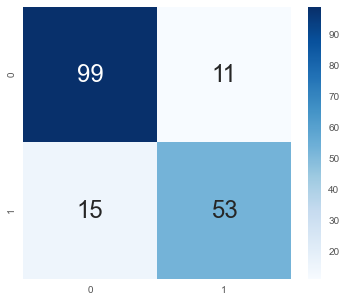

In [289]:
plt.figure(figsize = (6,5))
sns.heatmap(cm2, annot=True,annot_kws={"size": 24}, cmap="Blues") # 'coolwarm' 'Greens' 'BuPu' 'YlGnBu'

In [290]:
acc2 = accuracy_score(y_val, y_pred2)
acc2

0.8539325842696629

### Logistic Regression

In [291]:
parameters3 = [{'penalty': ['l1', 'l2'], 
                'solver' : ['newton-cg', 'lbfgs', 'liblinear', 'sag', 'saga']}]

classifier3 = GridSearchCV(estimator = LogisticRegression(), 
                            param_grid = parameters3, 
                            scoring = 'accuracy', 
                            cv = 10, 
                            n_jobs = -1)

classifier3 = classifier3.fit(x, y)

In [292]:
classifier3.cv_results_['mean_test_score']

array([       nan,        nan, 0.82682584,        nan, 0.82794944,
       0.82570225, 0.82570225, 0.82570225, 0.82570225, 0.82570225])

In [293]:
best_accuracy3 = classifier3.best_score_
best_parameters3 = classifier3.best_params_
print(best_accuracy3)
print(best_parameters3)

0.8279494382022472
{'penalty': 'l1', 'solver': 'saga'}


In [294]:
y_pred3 = classifier3.predict(x_val)
cm3 = confusion_matrix(y_val, y_pred3)
cm3

array([[96, 14],
       [15, 53]], dtype=int64)

<AxesSubplot:>

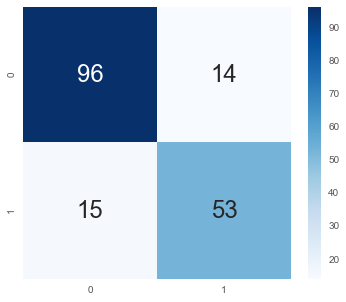

In [295]:
plt.figure(figsize = (6,5))
sns.heatmap(cm3, annot=True,annot_kws={"size": 24}, cmap="Blues") # 'coolwarm' 'Greens' 'BuPu' 'YlGnBu'

In [296]:
acc3 = accuracy_score(y_val, y_pred3)
acc3

0.8370786516853933

## Choosing best performance model

In [313]:
result = pd.DataFrame({'Model': ['KNN', 'Decision Tree', 'Logistic Regression'],
                       'Validation accuracy': [acc1, acc2, acc3]})
print(result)

                 Model  Validation accuracy
0                  KNN             0.870787
1        Decision Tree             0.853933
2  Logistic Regression             0.837079


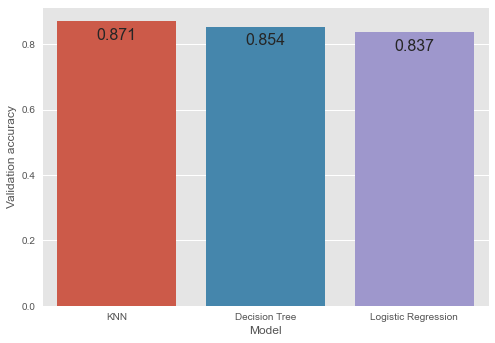

In [330]:
splot = sns.barplot(x='Model', y='Validation accuracy', data=result)

for p in splot.patches:
    splot.annotate(format(p.get_height(), '.3f'), 
                   (p.get_x() + p.get_width() / 2., p.get_height()), 
                   ha = 'center', va = 'center', 
                   size = 16,
                   xytext = (0, -14), 
                   textcoords = 'offset points')

We choose KNN as our best model because it gets highest validation accuracy 87.1%.